In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import os
import numpy as np
import string
from six.moves import range
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import matplotlib
import random


In [4]:
url = 'http://mattmahoney.net/dc/'


def maybe_download(filename, expected_bytes):
  #Download a file if not present, and make sure it's the right size.
  if not os.path.exists(filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified %s' % filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

def read_data(filename):
    if not os.path.exists('enwik8'):
        f = zipfile.ZipFile(filename)
        for name in f.namelist():
            full_text = tf.compat.as_str(f.read(name))
        f.close()
        """f = open('enwik8', 'w')
        f.write(text.encode('utf8'))
        f.close()"""
    else:
        f = open('enwik8', 'r')
        full_text = f.read().decode('utf8')
        f.close()
    return full_text
        
    f = codecs.open('enwik8', encoding='utf-8')
    text = f.read()
    f.close()
    return text

def check_not_one_byte(text):
    not_one_byte_counter = 0
    max_character_order_index = 0
    min_character_order_index = 2**16 
    present_characters = [0]*256
    number_of_characters = 0
    for i in range(len(text)):
        if ord(text[i]) > 255:
            not_one_byte_counter += 1 
        if len(present_characters) <  ord(text[i]):
            present_characters.extend([0]*(ord(text[i]) - len(present_characters) + 1))
            present_characters[ord(text[i])] = 1
            number_of_characters += 1
        elif present_characters[ord(text[i])] == 0:
            present_characters[ord(text[i])] = 1
            number_of_characters += 1
        if ord(text[i]) > max_character_order_index:
            max_character_order_index = ord(text[i])
        if ord(text[i]) < min_character_order_index:
            min_character_order_index = ord(text[i])
    return not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters

if not os.path.exists('enwik8_filtered'):
    if not os.path.exists('enwik8'):
        filename = maybe_download('enwik8.zip', 36445475)
    full_text = read_data(filename)
    new_text = u""
    new_text_list = list()
    for i in range(len(full_text)):
        if (i+1) % 10000000 == 0:
            print("%s characters are filtered" % i)
        if ord(full_text[i]) < 256:
            new_text_list.append(full_text[i])
    text = new_text.join(new_text_list)
    del new_text_list
    del new_text
    del full_text

    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)
    
    f = open('enwik8_filtered', 'w')
    f.write(text.encode('utf8'))
    f.close()
    
else:
    f = open('enwik8_filtered', 'r')
    text = f.read().decode('utf8')
    f.close() 
    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)    

number of not one byte characters:  0
min order index:  9
max order index:  255
total number of characters:  196


In [5]:
def text_plot(text, data, y_label, title, folder_list, filename, ylims=[0., 1.], threshold=None, show=False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 11}
    matplotlib.rc('font', **font)
    inches_per_char = 0.18
    fig = plt.figure(1)
    ax = plt.gca()
    fig.set_size_inches(inches_per_char*len(text), 2.5)
    x_list = [i for i in range(len(text))]
    locs = [i for i in range(len(text))]
    labels = list()
    for uchar in text:
        labels.append(matplotlib.text.Text(text=uchar))
    plt.xticks(locs, labels) 
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=14)
    plt.plot(x_list, data)
    colors = list()
    if threshold is not None:
        plt.plot(x_list, [threshold for _ in range(len(x_list))], 'r:', lw=3)
        for value in data:
            if value > threshold:
                colors.append('r')
            else:
                colors.append('w')
        labels = [item.get_text() for item in ax.get_xticklabels()]
        for label_idx, (label, color) in enumerate(zip(labels, colors)):
            if (label == ' ' or label == '\n' or label == '\t') and color == 'r':
                labels[label_idx] = unichr(0x0130)
        plt.xticks(locs, labels)
        for tick, color in zip(ax.get_xticklabels(),colors):
            #tick.set_backgroundcolor(color)
            if color == 'w':
                tick.set_bbox(dict(color=color, alpha=0.))
            else:
                tick.set_color(color)
                """tick.set_bbox(dict(color=color, alpha=1.))"""
            if tick.get_text() == unichr(0x0130):
                tick.set_fontsize(7)
                tick.set_color(color)
                tick.set_backgroundcolor(color)
    plt.xlim(x_list[0], x_list[-1])
    y1, y2 = plt.ylim()
    if ylims is not None:
        y1 = ylims[0]
        y2 = ylims[1]
    new_y1 = y1 - (y2 - y1) * 0.03
    new_y2 = y2 + (y2 - y1) * 0.03
    plt.ylim(new_y1, new_y2)
    locs = [y1 + (y2 - y1) * 0.1 * i for i in range(11)]
    ax.set_yticks(locs)
    plt.grid()
    plt.tight_layout(rect=(0, 0, 1., 1))
    save_figure(folder_list, filename)
    if show:
        plt.show()
    plt.close()

In [4]:
data = np.sin(np.array([i*0.2 for i in range(75)]))
#data = 1. + 0.00001 * data

In [70]:
test_text = ''.join(['m ' for _ in range(37)])
test_text += 'm'


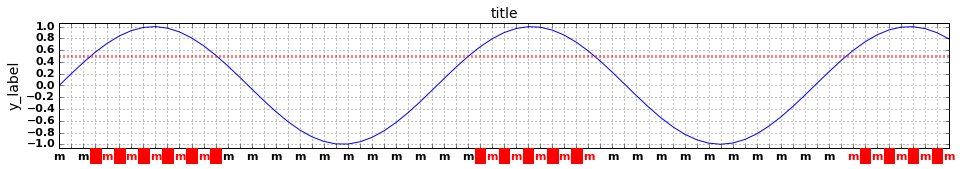

In [71]:
offset = 9000
text_plot(text[offset : offset + 75], data, 'y_label', 'title', ['folder_list'], 'filename', threshold=0.5, show=True)

In [67]:
length = 75
num_nodes = 10
pointer = 0
text_sample = text[pointer: pointer+length]
data = list()
for _ in range(num_nodes):
    data.append(list())
    for k in range(length):
        data[-1].append(random.uniform(0, 2))


In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def text_gates_plot(text, data, title, folder_list, filename, vmin=0., vmax=1., show=False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 16}
    matplotlib.rc('font', **font)
    hist_data = np.ndarray(shape = (len(text)*len(data), 3), dtype = type(data[0][0]))
    dims = [len(data), len(text)]
    for i in range(len(text)):
        for j in range(len(data)):
            hist_data[dims[1] * j + i, 0] = i
            hist_data[dims[1] * j + i, 1] = j
            hist_data[dims[1] * j + i, 2] = data[j][i]
    borders = np.ndarray(shape = (4, 3), dtype = type(data[0][0]))
    for i in range(2):
        for j in range(2):
            borders[i*2+j, 0] = i * len(text)
            borders[i*2+j, 1] = j * len(data)
            borders[i*2+j, 2] = 0.
    hist_data = np.concatenate((hist_data, borders), axis=0)
    if vmin is not None and vmax is not None:
        norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    plt.hist2d(hist_data[:, 0], hist_data[:, 1], bins = [dims[1], dims[0]], weights = hist_data[:, 2], norm=norm)
    plt.title(title, fontsize=14)
    locs = [0.5+i for i in range(len(text))]
    labels = [text[i] for i in range(len(text))]
    plt.xticks(locs, labels)
    x_horisontal = [0, len(text)]
    for i in range(len(data) - 1):
        plt.plot(x_horisontal, [i+1, i+1], 'w', lw=2)
    y_vertical = [0, len(data)]
    for i in range(len(text) - 1):
        plt.plot([i+1, i+1], y_vertical, 'w', lw=2)    
    null_formatter = matplotlib.ticker.NullFormatter()
    ax = plt.gca()
    fig = plt.gcf()
    ax.get_yaxis().set_major_formatter(null_formatter)
    ax.tick_params(length=0)
    inches_per_char = 0.25
    fig.set_size_inches(inches_per_char*len(text), inches_per_char * (len(data) + 3))   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    plt.colorbar(cax=cax)
    plt.tight_layout(pad=1.02, rect=(0., 0., 1., 1.))
    save_figure(folder_list, filename)
    if show:
         plt.show()
    plt.close()       
    

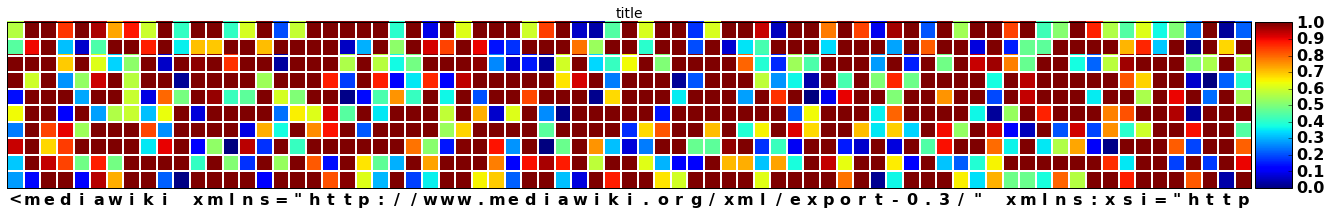

In [21]:
text_gates_plot(text_sample, data, 'title', ['folder_list'], 'filename', show=True)

In [235]:
def hist_for_letter(data, x_label, y_label, title, folder_list, filename, show=False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 10}
    matplotlib.rc('font', **font)
    fig = plt.figure(1)
    inches_per_node = 0.2
    fig.set_size_inches(inches_per_node*len(data),2.)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=14)
    plt.plot(data, drawstyle='steps-mid')
    plt.fill_between([i for i in range(len(data))], data, step='mid')
    locs = [i for i in range(len(data))]
    labels = list()
    for loc in locs:
        if loc % 5 == 0:
            labels.append(str(loc))
        else:
            labels.append("")
    plt.xticks(locs, labels)
    plt.grid()
    plt.xlim(0, len(data)-1)
    save_figure(folder_list, filename)
    if show:
        plt.show()
    plt.close()

In [3]:
span = 1000
length = 75
num_strings = 100
text_list = list()
data_list = list()
pointer = 0
for i in range(num_strings):
    text_list.append(text[pointer: pointer+length])
    data = list()
    for k in range(length):
        data.append(0. + 0.00000001 * random.randint(0, 10))
    data_list.append(data)
    pointer += span
print(text_list)


[u'<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.3/" xmlns:xsi="http', u'ce key="10">Template</namespace>\n      <namespace key="11">Template talk</n', u'ng cur_id=5: {{R from CamelCase}}</comment>\n      <text xml:space="preserve', u'leComputing</title>\n    <id>10</id>\n    <revision>\n      <id>15898945</id>\n', u'or />\n      <comment>/* Anarchist Communism */  too many brackets</comment>', u'y:&amp;#945;&amp;#957;&amp;#945;&amp;#961;&amp;#967;&amp;#943;&amp;#945;|&a', u'ion]] of autonomous individuals, [[mutual aid]], and [[self-governance]]. \n', u'g/archive/marx/works/1884/origin-family/index.htm Origins of the Family, Pr', u'kin|Kropotkin]] found similar ideas in [[stoicism|stoic]] [[Zeno of Citium]', u"arliest times to the present day'', 1945.&lt;/ref&gt; [[Diggers (True Level", u'ader in the [[American Indian Movement]], has repeatedly stated that he is ', u"e-Joseph Proudhon]] published ''[[What is Property?]]'' in 1840 that the te", u"accordance with principles of

In [10]:
uppercase = [u'A', u'B', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'J', u'K', u'L', u'M', u'N', u'O', u'P', u'Q', u'R', u'S', u'T', u'U', u'V', u'W', u'X', u'Y', u'Z']
lowercase = [u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j', u'k', u'l', u'm', u'n', u'o', u'p', u'q', u'r', u's', u't', u'u', u'v', u'w', u'x', u'y', u'z']
def structure_vocabulary_plots(text_list,
                               data_list,
                               figure_title,
                               ylabel,
                               folder_list,
                               filename,
                               max_num_words_per_length=100,
                               ylims=None,
                               threshold=None,
                               show=False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 9}
    matplotlib.rc('font', **font)
    word_data = dict()
    chars = [list(), list(), list(), list()]
    
    for text_idx, text in enumerate(text_list):
        data = data_list[text_idx]
        read = False                        # flag used for removing last part of the word left in the beginning of data
        reading_word = False                # flag used to point that now word is being read
        length = 0          #word length
        current_data = list()           # current word is put here
        for char_idx, char in enumerate(text):
            if not(char in uppercase or char in lowercase):
                read = True                 # parsing of new sentence is started
                if reading_word:                # if current word is finished
                    reading_word = False             
                    if length in word_data.keys():
                        if word_data[length]['counter'] < max_num_words_per_length:
                            for i, value in enumerate(current_data):
                                word_data[length]['data'][i] += value
                            word_data[length]['counter'] += 1
                            word_data[length]['used_words'].append(current_data)
                    else:
                        word_data[length] = {'data': list(current_data), 'counter': 1, 'used_words': [current_data]}
                    current_data = list()
                    length = 0
                if char in chars[0]:
                    idx = chars[0].index(char)
                    chars[1][idx] += data[char_idx]
                    chars[2][idx] += 1
                    chars[3][idx].append(data[char_idx])
                else:
                    chars[0].append(char)
                    chars[1].append(data[char_idx])
                    chars[2].append(1)
                    chars[3].append([data[char_idx]])
            elif read: 
                if length == 0:
                    reading_word = True
                length += 1
                current_data.append(data[char_idx])
    length = 1
    length_counter = 0
    plotting_word_data = list()
    while length < 20 and length_counter < 10:
        if length in word_data.keys():
            length_counter += 1
            error_list = list()
            for i in range(len(word_data[length]['data'])):
                char_error = 0
                word_data[length]['data'][i] = float(word_data[length]['data'][i]) / word_data[length]['counter']
                for j in range(word_data[length]['counter']):
                    char_error += (word_data[length]['used_words'][j][i] - word_data[length]['data'][i])**2
                char_error /= word_data[length]['counter']
                error_list.append(char_error**(0.5))
            
            plotting_word_data.append({'length': length,
                                      'data': list(word_data[length]['data']),
                                      'error': list(error_list),
                                      'counter': word_data[length]['counter']})
        length += 1
    del word_data
    
    num_chars = len(chars[0])
    for i in range(num_chars):
        char_error = 0
        chars[1][i] = float(chars[1][i]) / chars[2][i]
        for j in range(chars[2][i]):
            char_error += (chars[3][i][j] - chars[1][i])**2
        chars[3][i] = (char_error / chars[2][i])**(0.5)
    chars[0], chars[1], chars[2], chars[3] = (list(t) for t in zip(*sorted(zip(chars[0], chars[1], chars[2], chars[3]),
                                              key=lambda dot: dot[1],
                                              reverse=True)))
    
    inches_per_char = 0.2
    fig = plt.figure(1)
    fig.set_size_inches(inches_per_char*75,5.)
    num_words = len(plotting_word_data)
    width_ratios = list()
    for word in plotting_word_data:
        width_ratios.append(word['length']+1)
    gs = matplotlib.gridspec.GridSpec(2, num_words,
                                      width_ratios=width_ratios)

    
    low_axes = plt.subplot2grid((2, num_words), (1, 0), colspan=num_words)    
    #plt.plot(chars[1], marker='o', mfc='r')
    plt.errorbar([i for i in range(len(chars[1]))], chars[1], yerr=chars[3], ecolor='green', marker='o', mfc='r')
    locs = [i for i in range(len(chars[1]))]
    labels = list()
    colors = list()
    for char_idx, char in enumerate(chars[0]):
        if char != u'\n' and char != u'\t':
            labels.append(matplotlib.text.Text(text=u"'%s'" % char))
        elif char == u'\n':
            labels.append(matplotlib.text.Text(text=u"'\\n'"))
        elif char == u'\t':
            labels.append(matplotlib.text.Text(text=u"'\\t'"))
        if threshold is not None:
            if chars[1][char_idx] > threshold:
                colors.append('r')
            else:
                colors.append('k')
    if threshold is not None:
        x_threshold_line = [i for i in range(len(chars[1]))]
        plt.plot(x_threshold_line, [threshold for _ in range(len(x_threshold_line))], 'r:', lw=3)
            
    plt.xticks(locs,labels)
    plt.ylabel(ylabel)
    plt.title('other characters')
    plt.grid()
    if threshold is not None:
        for tick, color in zip(low_axes.get_xticklabels(),colors):
            tick.set_color(color)
    for tick in low_axes.get_xticklabels():
        tick.set_fontsize(12)
    lower_y1, lower_y2 = plt.ylim()
    axes_list = list()
    upper_y2 = -1.7976931348623157e+308
    upper_y1 = 1.7976931348623157e+308
    for word_idx, word in enumerate(plotting_word_data):
        x_list = [i+1 for i in range(word['length'])]
        colors = list()
        if word_idx > 0:
            axes_list.append(plt.subplot(gs[word_idx]))
        else:
            axes_list.append(plt.subplot(gs[word_idx]))
        plt.grid()
        plt.errorbar(x_list, word['data'], word['error'], ecolor='green', marker='o', mfc='r')
        plt.xlim(x_list[0]-1, x_list[-1]+1)
        locs = x_list
        labels = list()
        for i, x in enumerate(x_list):
            labels.append(str(x))
        plt.xticks(locs, labels)
        if threshold is not None:
            x_threshold_line = [i for i in range(word['length']+2)]
            plt.plot(x_threshold_line, [threshold for _ in range(len(x_threshold_line))], 'r:', lw=3)
            for value in word['data']:
                if value > threshold:
                    colors.append('r')
                else:
                    colors.append('k')
            for tick, color in zip(axes_list[-1].get_xticklabels(),colors):
                tick.set_color(color)
        for tick in axes_list[-1].get_xticklabels():
            tick.set_fontsize(12)
        plt.title("L=%s(%s)" % (word['length'], word['counter']))
        cur_upper_y1, cur_upper_y2 = plt.ylim()
        
        if cur_upper_y1 < upper_y1:
            upper_y1 = cur_upper_y1
        if cur_upper_y2 > upper_y2:
            upper_y2 = cur_upper_y2
            
    if lower_y1 < upper_y1:
        y1 = lower_y1
    else:
        y1 = upper_y1

    if lower_y2 > upper_y2:
        y2 = lower_y2
    else:
        y2 = upper_y2
        
    if ylims is not None:        
        if y1 < ylims[0]:
            y1 = ylims[0]
        if y2 > ylims[1]:
            y2 = ylims[1]

    new_y1 = y1 - 0.03 * (y2 - y1)
    new_y2 = y2 + 0.03 * (y2 - y1)
    locs = [y1 + 0.1 * (y2 - y1) * i for i in range(11)]
    labels = [str(locs[i]) for i in range(11)]
    y1 = new_y1
    y2 = new_y2  
    plt.ylim(y1, y2)
    low_axes.set_ylim(y1, y2)
    low_axes.set_yticks(locs)
    cur_labels = ['' for _ in range(len(labels))]
    null_formatter = matplotlib.ticker.NullFormatter()
    for ax_idx, ax in enumerate(axes_list[1:]):
        ax.get_yaxis().set_major_formatter(null_formatter)
        ax.set_ylim(y1, y2)
    axes_list[0].set_ylim(y1, y2)
    axes_list[0].set_ylabel(ylabel)
    axes_list[0].set_yticks(locs)
    axes_list[0].get_yaxis().get_major_formatter().set_useOffset(False)
    axes_list[0].get_yaxis().get_major_formatter().set_scientific(False)
  
    plt.tight_layout(pad=1.08, rect=(0, 0, 1, 0.95))

    fig.text(0.5, 0.97, figure_title, ha='center', va='top', size='x-large')
    
    save_figure(folder_list, filename)
    if show:
        plt.show()
    plt.close()        

In [6]:
def save_figure(folder_list, filename):
    if filename is not None:
        if len(folder_list) > 0:
            current_folder = folder_list[0]
            if not os.path.exists(current_folder):
                os.makedirs(current_folder)
            for idx, folder in enumerate(folder_list):
                if idx > 0:
                    current_folder += ('/' + folder)
                    if not os.path.exists(current_folder):
                        os.makedirs(current_folder)
        else:
            current_folder = ""
        plot_filename = str(filename)
        if len(current_folder) > 0:
            current_folder += '/'
        if os.path.exists(current_folder + plot_filename + '.png'):
            plot_filename += '#'
            index = 0
            while os.path.exists(current_folder + plot_filename + str(index) + '.png'):
                index += 1
            plot_filename += str(index)
        plt.savefig(current_folder + plot_filename + '.png')    

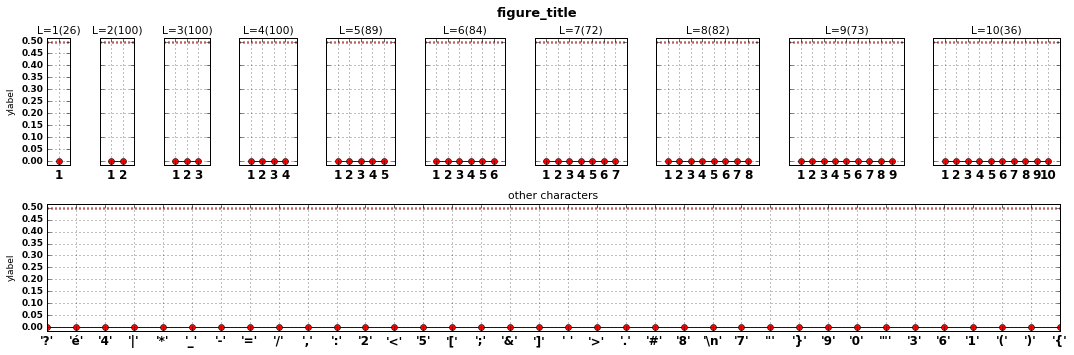

In [13]:
structure_vocabulary_plots(text_list,
                           data_list,
                           'figure_title',
                           'ylabel',
                           ['folder_list'],
                           'filename',
                           ylims=[0., 10.],
                           threshold=0.5,
                           show=True)

In [70]:
span = 1000
num_gates = 10
length = 75
num_strings = 100
text_list = list()
data_list = list()
pointer = 0
for i in range(num_strings):
    text_list.append(text[pointer: pointer+length])
    data = list()
    for j in range(num_gates):
        gate_data = list()
        for k in range(length): 
            gate_data.append(0.1 * j + 0.05 * j * random.randint(-5, 5))
        data.append(gate_data)
    data_list.append(data)
    pointer += span


In [71]:
def double_list(double_list):
    if isinstance(double_list, list):
        return [list(double_list[i]) for i in range(len(double_list))]
    else:
        return [list() for _ in range(double_list)]

def inc_double(to_be_increased, summand):
    for node_idx, node_data in enumerate(to_be_increased):
        for value_idx, value in enumerate(summand[node_idx]):
            node_data[value_idx] += value
            
def inc_by_list(to_be_increased, char_idx, summand):
    for node_idx, node_data in enumerate(to_be_increased):
        node_data[char_idx] += summand[node_idx]
            
def div_double(to_be_divided, divider):
    for node_data in to_be_divided:
        for i in range(len(node_data)):
            node_data[i] /= divider
            
def div_by_list(to_be_divided, divider):
    for node_data in to_be_divided:
        for i in range(len(node_data)):
            node_data[i] /= divider[i]        

def stddev_double(average, used_words):
    stddev = [[0]*len(average[0]) for _ in range(len(average))]
    num_used_words = len(used_words)
    for used_word in used_words:
        for node_idx, (node_sample, node_average) in enumerate(zip(used_word, average)):
            for letter_idx, (letter_sample, letter_average) in enumerate(zip(node_sample, node_average)):
                stddev[node_idx][letter_idx] += (letter_sample - letter_average)**2
    div_double(stddev, num_used_words)
    for node_stddev in stddev:
        for letter_idx, letter_stddev in enumerate(node_stddev):
            node_stddev[letter_idx] = letter_stddev**(0.5)
    return stddev

def stddev_with_lists(average, lists):
    average_tuples = zip(*average)
    error_lists = list()
    num_nodes = len(average_tuples[0])
    for average_idx, average_tuple in enumerate(average_tuples):
        error_list = [0]*num_nodes
        num_lists = len(lists[average_idx])
        for one_list in lists[average_idx]:
            for node_idx, node_value in enumerate(average_tuple):
                error_list[node_idx] += (one_list[node_idx] - average_tuple[node_idx])**2
        for node_idx, _ in enumerate(error_list):
            error_list[node_idx] = (error_list[node_idx] / num_lists)**0.5
        error_lists.append(error_list)
    return [list(tuple_error) for tuple_error in zip(*error_lists)]
            

def append_double(current_data, data, letter_idx):
    for node_idx, current_node in enumerate(current_data):
        current_node.append(data[node_idx][letter_idx])
        
def extract_list(data, char_idx):
    extracted_list = list()
    for node_data in data:
        extracted_list.append(node_data[char_idx])
    return extracted_list
        
def construct_hist_data(double_list):
    dims = [len(double_list), len(double_list[0])]
    hist_data = np.ndarray(shape=(dims[0] * dims[1], 3), dtype=type(double_list[0][0]))
    for i in range(dims[1]):
        for j in range(dims[0]):
            hist_data[dims[1] * j + i, 0] = i
            hist_data[dims[1] * j + i, 1] = j
            hist_data[dims[1] * j + i, 2] = double_list[j][i] 
    return hist_data, dims

def get_range(data):
    vmin = data[0][0]
    vmax = data[0][0]
    for value_list in data:
        for value in value_list:
            if value < vmin:
                vmin = value
            if value > vmax:
                vmax = value
    return (vmin, vmax)
            

def mark_errors(data, errors, threshold=0.1, vmin=0., vmax=1.):
    max_level = 0
    if vmin is None or vmax is None:
        data_range = get_range(data)
        if vmin is None:
            vmin = data[0]
        if vmax is None:
            vmax = data[1]
    for list_idx, error_list in enumerate(errors):
        for value_idx, error in enumerate(error_list):
            if error > threshold:
                level = int(error / threshold)
                if level > 4:
                    level = 4
                if level > max_level:
                    max_level = level 
                vertical_position = float(2*list_idx+1)/2
                horizontal_position = float(2*value_idx+1)/2
                color_grade = (data[list_idx][value_idx] - vmin) / (vmax - vmin)
                if color_grade > 0.8 or color_grade < 0.3:
                    color = 'w'
                else:
                    color = 'k'
                properties = matplotlib.font_manager.FontProperties(weight='light')
                plt.text(horizontal_position, vertical_position, str(level), ha='center', va='center', color=color, fontsize=8, fontproperties=properties)
    return max_level        
            

uppercase = [u'A', u'B', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'J', u'K', u'L', u'M', u'N', u'O', u'P', u'Q', u'R', u'S', u'T', u'U', u'V', u'W', u'X', u'Y', u'Z']
lowercase = [u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j', u'k', u'l', u'm', u'n', u'o', u'p', u'q', u'r', u's', u't', u'u', u'v', u'w', u'x', u'y', u'z']
def vocabulary_gates_plots(text_list,
                               data_list,
                               figure_title,
                               folder_list,
                               filename,
                               max_num_words_per_length=100,
                               vmin=0.,
                            vmax=1.,
                           error_threshold=0.1,
                               show=False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 9}

    max_level = 0
    matplotlib.rc('font', **font)
    word_data = dict()
    chars = [list(), double_list(len(data_list[0])), list(), list()]
    
    for text_idx, text in enumerate(text_list):
        data = data_list[text_idx]
        read = False
        reading_word = False
        length = 0          #word length
        current_data = double_list(len(data))
        for char_idx, char in enumerate(text):
            if not(char in uppercase or char in lowercase):
                read = True
                if reading_word:
                    reading_word = False
                    if length in word_data.keys(): 
                        if word_data[length]['counter'] < max_num_words_per_length:
                            inc_double(word_data[length]['data'], current_data)
                            word_data[length]['counter'] += 1
                            word_data[length]['used_words'].append(current_data)
                    else:
                        word_data[length] = {'data': double_list(current_data), 'counter': 1, 'used_words': [current_data]}                       
                    current_data = double_list(len(data))
                    length = 0
                if char in chars[0]:
                    idx = chars[0].index(char)
                    inc_by_list(chars[1], idx, extract_list(data, char_idx))
                    chars[2][idx] += 1
                    chars[3][idx].append(extract_list(data, char_idx))
                else:
                    chars[0].append(char)
                    append_double(chars[1], data, char_idx)
                    chars[2].append(1)
                    chars[3].append([extract_list(data, char_idx)])
            elif read: 
                if length == 0:
                    reading_word = True
                length += 1
                append_double(current_data, data, char_idx)
    length = 1
    length_counter = 0
    plotting_word_data = list()
    while length < 20 and length_counter < 10:
        if length in word_data.keys():
            length_counter += 1
            div_double(word_data[length]['data'], word_data[length]['counter'])
            stddev = stddev_double(word_data[length]['data'], word_data[length]['used_words'])
            plotting_word_data.append({'length': length,
                                      'data': double_list(word_data[length]['data']),
                                      'error': stddev,
                                      'counter': word_data[length]['counter']})
        length += 1
    del word_data
    
    div_by_list(chars[1], chars[2])
    chars[3] = stddev_with_lists(chars[1], chars[3])
        
    values_for_sorting = list()
    for idx in range(len(chars[1][0])):
        values_for_sorting.append(0)
        for char_list in chars[1]:
            values_for_sorting[-1] += char_list[idx]
    #prepairing for sorting
    chars[1] = zip(*chars[1])
    chars[3] = zip(*chars[3])
    chars[0], chars[1], chars[3], _ = (list(t) for t in zip(*sorted(zip(chars[0], chars[1], chars[3], values_for_sorting),
                                              key=lambda dot: dot[3],
                                              reverse=True)))
    #returning to normal form
    chars[1] = [list(t) for t in zip(*chars[1])]
    chars[3] = [list(t) for t in zip(*chars[3])]
    
    if vmin is None or vmax is None:
        ranges = [get_range(chars[1])]
        for word in plotting_word_data:
            ranges.append(get_range(word['data']))
        RANGE = (ranges[0])
        for one_range in ranges[1:]:
            if one_range[0] < RANGE[0]:
                RANGE[0] = one_range[0]
            if one_range[1] > RANGE[1]:
                RANGE[1] = one_range[1]
        if vmin is None or RANGE[0] < vmin:
            vmin = RANGE[0]
        if vmax is None or RANGE[1] > vmax:
            vmax = RANGE[1]
    
    inches_per_char = 0.2
    fig = plt.figure(1)
    title_space = 2.
    reserved = 4.
    pad = 2.
    fraction = 2.
    height_up = len(chars[1])
    height_down = len(chars[1])
    colorbar_height = 2.
    space = 2.7
    fig_height = height_up + height_down + title_space + colorbar_height + space*3
    fig.set_size_inches(inches_per_char * 75, inches_per_char * fig_height)
    num_words = len(plotting_word_data)
    width_ratios = list()
    for word in plotting_word_data:
        width_ratios.append(word['length'])
    
    height_ratios = [height_up, height_down, colorbar_height]
    gs = matplotlib.gridspec.GridSpec(3, num_words,
                                      width_ratios=width_ratios,
                                      height_ratios=height_ratios)
    
    subplotspec=gs.new_subplotspec((1, 0), 1, num_words)
    low_axes = plt.subplot(subplotspec)
    #low_axes = plt.subplot2grid((2, num_words), (1, 0), colspan=num_words)    
    hist_data, dims = construct_hist_data(chars[1])
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    edges = [[0, dims[1]], [0, dims[0]]]
    _, _, _, Image = plt.hist2d(hist_data[:, 0], hist_data[:, 1], bins = [dims[1], dims[0]], range=edges, weights = hist_data[:, 2], norm=norm)
    maxl = mark_errors(chars[1], chars[3], threshold=error_threshold, vmin=vmin, vmax=vmax)
    if maxl > max_level:
        max_level = maxl
    x_horisontal = [0, dims[1]]
    for i in range(dims[0] - 1):
        plt.plot(x_horisontal, [i+1, i+1], 'w', lw=2)
    y_vertical = [0, dims[0]]
    for i in range(dims[1] - 1):
        plt.plot([i+1, i+1], y_vertical, 'w', lw=2)    
    locs = [i+0.5 for i in range(len(chars[0]))]
    labels = list()
    colors = list()
    for char_idx, char in enumerate(chars[0]):
        if char != u'\n' and char != u'\t':
            labels.append(matplotlib.text.Text(text=u"'%s'" % char))
        elif char == u'\n':
            labels.append(matplotlib.text.Text(text=u"'\\n'"))
        elif char == u'\t':
            labels.append(matplotlib.text.Text(text=u"'\\t'"))
    plt.xticks(locs,labels)
    low_axes.tick_params(length=0)
    null_formatter = matplotlib.ticker.NullFormatter()
    low_axes.get_yaxis().set_major_formatter(null_formatter)
    plt.title('other characters')
    for tick in low_axes.get_xticklabels():
        tick.set_fontsize(12)
    
    subplotspec=gs.new_subplotspec((2, 0), 1, 7)
    colorbar_axes = plt.subplot(subplotspec)
    plt.colorbar(Image, cax=colorbar_axes, orientation='horizontal')
    axes_list = list()
    upper_y2 = -1.7976931348623157e+308
    upper_y1 = 1.7976931348623157e+308
    for word_idx, word in enumerate(plotting_word_data):
        colors = list()
        axes_list.append(plt.subplot(gs[word_idx]))
        hist_data, dims = construct_hist_data(word['data'])
        edges = [[0, dims[1]], [0, dims[0]]]
        norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        plt.hist2d(hist_data[:, 0], hist_data[:, 1], bins = [dims[1], dims[0]], range=edges, weights = hist_data[:, 2], norm=norm)
        maxl = mark_errors(word['data'], word['error'], threshold=error_threshold, vmin=vmin, vmax=vmax)
        if maxl > max_level:
            max_level = maxl
        x_horisontal = [0, dims[1]]
        for i in range(dims[0] - 1):
            plt.plot(x_horisontal, [i+1, i+1], 'w', lw=2)
        y_vertical = [0, dims[0]]
        for i in range(dims[1] - 1):
            plt.plot([i+1, i+1], y_vertical, 'w', lw=2)    
        length = len(word['data'][0])
        locs = [0.5+i for i in range(length)]
        labels = list()
        for i, _ in enumerate(locs):
            labels.append(str(i+1))
        plt.xticks(locs, labels)
        axes_list[-1].tick_params(length=0)
        for tick in axes_list[-1].get_xticklabels():
            tick.set_fontsize(12)
        plt.title("L=%s(%s)" % (word['length'], word['counter']))
        
    null_formatter = matplotlib.ticker.NullFormatter()
    for ax_idx, ax in enumerate(axes_list[:]):
        ax.get_yaxis().set_major_formatter(null_formatter)
        
    subplotspec=gs.new_subplotspec((2, 7), 1, 3)
    table_axes = plt.subplot(subplotspec)    
    
    cell_text = [list(), list()]
    cell_text[0].append('mark')
    cell_text[1].append('stddev')
    for i in range(max_level):
        cell_text[0].append(str(i+1))
        cell_text[1].append('%s - %s' % ((i+1)*error_threshold, (i+2)*error_threshold))
    if max_level == 4:
        cell_text[1][-1] = '> %s' % (max_level*error_threshold)
    table_axes.table(cellText=cell_text,
                     cellLoc='center',
                     loc='center',
                     fontsize=20)

    table_axes.set_axis_off()
    
    plt.tight_layout(rect=(0, 0, 1, float(fig_height-title_space)/fig_height))

    fig.text(0.5, float(fig_height-float(title_space)/2)/fig_height, figure_title, ha='center', va='top', size='x-large')
    
    save_figure(folder_list, filename)
    if show:
        plt.show()
    plt.close()  

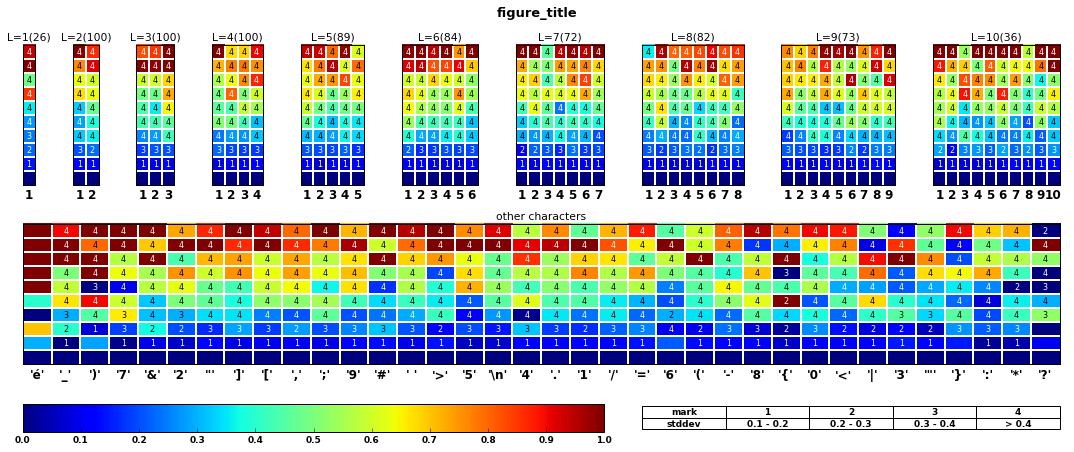

In [72]:
vocabulary_gates_plots(text_list,
                               data_list,
                               'figure_title',
                               ['folder_list'],
                               'filename',
                               max_num_words_per_length=100,
                               vmin=0.,
                            vmax=1.,
                           error_threshold=0.1,
                               show=True)

In [107]:
gs = matplotlib.gridspec.GridSpec(2, 1,
                                height_ratios=[1, 2])

    
high_axes = plt.subplot2grid((2, num_words), (1, 0), colspan=num_words)    

[[1, 0, 0], [0, 0, 0], [0, 0, 0]]
